Importing fundamental libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset

In [2]:
dados = pd.read_csv('kidney_disease.csv')

Showing the first five lines

In [3]:
dados.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


Removing id column

In [4]:
dados = dados.drop('id',axis=1)

In [5]:
dados.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


Showing initial statistcs from the data

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

It looks like there are lines with NaNs

In [7]:
dados.isna().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

There are several NaNs in the columns rbc, wc, rc for example. I will drop them all since most of them are categorical columns and replace NaNs using interpolation doesn't make sense

In [8]:
dados = dados.dropna()

In [9]:
dados.isna().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [10]:
dados.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd


In [11]:
dados = dados.reset_index()

In [12]:
dados['classification'].unique()

array(['ckd', 'notckd'], dtype=object)

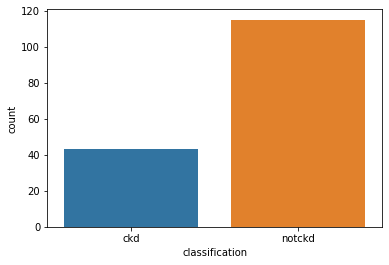

In [13]:
sns.countplot(dados['classification'])

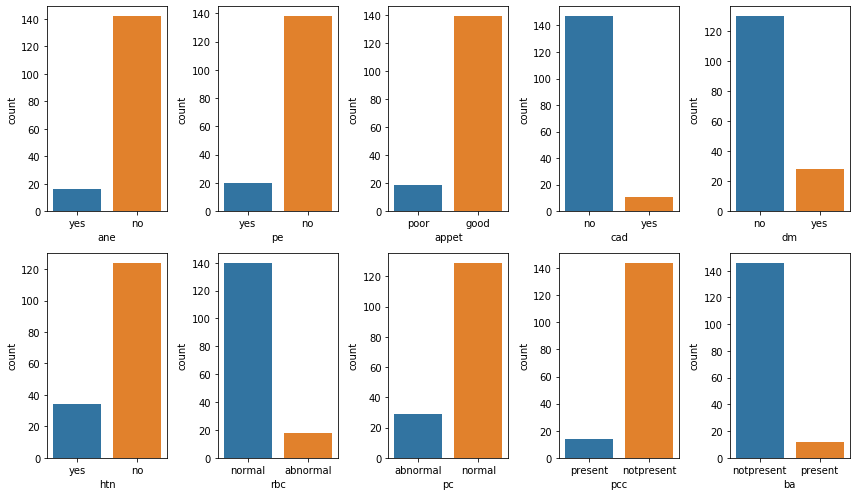

In [14]:
fig, ax = plt.subplots(2,5,figsize=(12,7))
sns.countplot(dados['ane'],ax=ax[0][0])
sns.countplot(dados['pe'],ax=ax[0][1])
sns.countplot(dados['appet'],ax=ax[0][2])
sns.countplot(dados['cad'],ax=ax[0][3])
sns.countplot(dados['dm'],ax=ax[0][4])
sns.countplot(dados['htn'],ax=ax[1][0])
sns.countplot(dados['rbc'],ax=ax[1][1])
sns.countplot(dados['pc'],ax=ax[1][2])
sns.countplot(dados['pcc'],ax=ax[1][3])
sns.countplot(dados['ba'],ax=ax[1][4])
plt.tight_layout()

In [15]:
dados['pcv'] = dados['pcv'].astype(int)
dados['wc'] = dados['wc'].astype(int)
dados['rc'] = dados['rc'].astype(float)

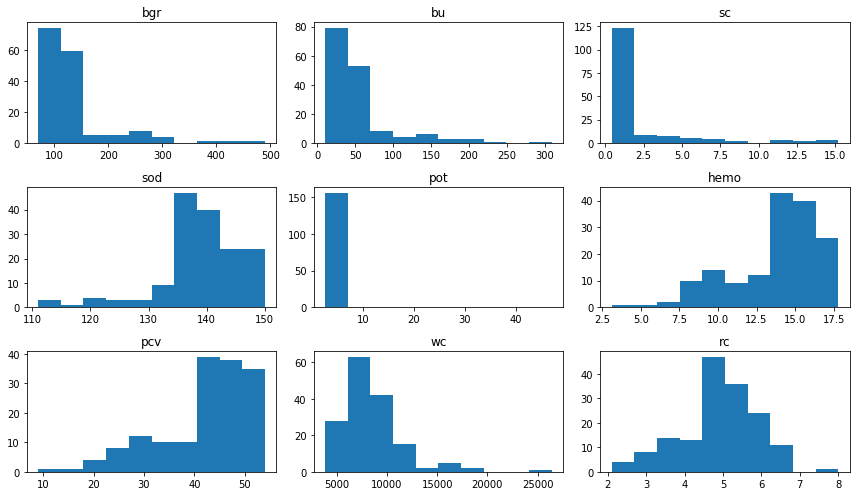

In [16]:
fig, ax = plt.subplots(3,3,figsize=(12,7))
ax[0][0].hist(dados['bgr'])
ax[0][0].set_title('bgr')
ax[0][1].hist(dados['bu'])
ax[0][1].set_title('bu')
ax[0][2].hist(dados['sc'])
ax[0][2].set_title('sc')

ax[1][0].hist(dados['sod'])
ax[1][0].set_title('sod')
ax[1][1].hist(dados['pot'])
ax[1][1].set_title('pot')
ax[1][2].hist(dados['hemo'])
ax[1][2].set_title('hemo')

ax[2][0].hist(dados['pcv'])
ax[2][0].set_title('pcv')
ax[2][1].hist(dados['wc'])
ax[2][1].set_title('wc')
ax[2][2].hist(dados['rc'])
ax[2][2].set_title('rc')
plt.tight_layout()

In [17]:
colunas_normalizar = ['bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
for col in colunas_normalizar:
    scaler = MinMaxScaler(feature_range=(0,1))
    dados[col] = scaler.fit_transform(dados[col].values.reshape(-1,1))

In [20]:
dados.head()

,index,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,0.511111,0.128319,0.305085,yes,no,no,poor,yes,yes,ckd
1,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,0.444444,0.367257,0.271186,yes,yes,no,poor,no,yes,ckd
2,11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,...,0.511111,0.030973,0.288136,yes,yes,no,poor,yes,no,ckd
3,14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,...,0.155556,0.318584,0.084746,yes,yes,yes,poor,yes,no,ckd
4,20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,...,0.333333,0.238938,0.186441,yes,yes,yes,poor,yes,yes,ckd


In [21]:
colunas_onehot = ['rbc','pc','ba','pcc','pe','appet','cad','dm','htn','ane']

In [22]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [23]:
for col in colunas_onehot:
    enc = OneHotEncoder()
    dados[col] = enc.fit_transform(dados[col].values.reshape(-1,1)).toarray()

In [24]:
enc = LabelEncoder()
dados['classification'] = enc.fit_transform(dados['classification'])

In [25]:
dados.head()

,index,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,0.0,1.0,...,0.511111,0.128319,0.305085,0.0,1.0,1.0,0.0,0.0,0.0,0
1,9,53.0,90.0,1.020,2.0,0.0,1.0,1.0,0.0,1.0,...,0.444444,0.367257,0.271186,0.0,0.0,1.0,0.0,1.0,0.0,0
2,11,63.0,70.0,1.010,3.0,0.0,1.0,1.0,0.0,1.0,...,0.511111,0.030973,0.288136,0.0,0.0,1.0,0.0,0.0,1.0,0
3,14,68.0,80.0,1.010,3.0,2.0,0.0,1.0,0.0,0.0,...,0.155556,0.318584,0.084746,0.0,0.0,0.0,0.0,0.0,1.0,0
4,20,61.0,80.0,1.015,2.0,0.0,1.0,1.0,1.0,1.0,...,0.333333,0.238938,0.186441,0.0,0.0,0.0,0.0,0.0,0.0,0


In [26]:
dados['classification'].unique()

array([0, 1])

In [27]:
corr = dados.corr()

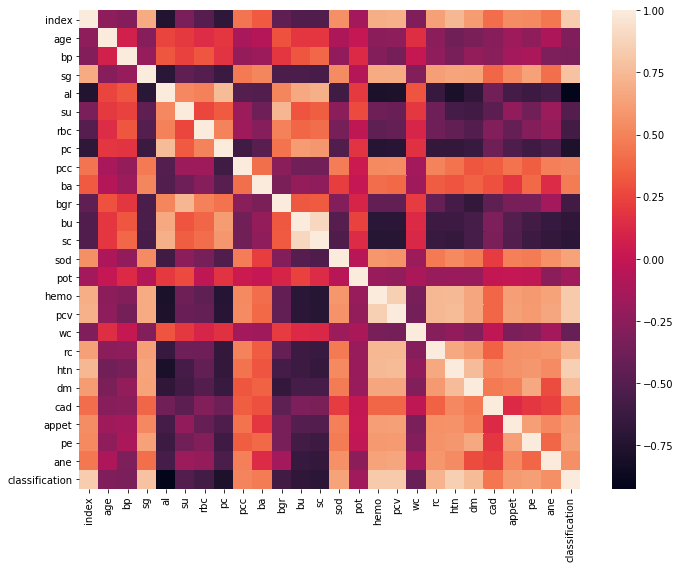

In [28]:
fig,ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,ax=ax)
plt.tight_layout()

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score,KFold,StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,average_precision_score,recall_score,roc_auc_score

In [30]:
X = dados.drop('classification',axis=1).values
Y = dados['classification'].values

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=42,stratify=Y)

In [32]:
accuracy = []
precision =[]
recall = []
f1 = []
roc = []

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [34]:
print("Logistic Regression")
log_reg_params = {"penalty": ['None','l1', 'l2','elasticnet'], 'C': [1, 10, 100], 
                  'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
grid_log_reg = GridSearchCV(LogisticRegression(max_iter=10000), log_reg_params,n_jobs=8,cv=10,scoring='roc_auc_ovo')
grid_log_reg.fit(X_train, y_train)
logreg = grid_log_reg.best_estimator_
log_reg_score = cross_val_score(logreg, X_train, y_train, cv=10,scoring='roc_auc_ovo')
log_reg_score_teste = cross_val_score(logreg, X_test, y_test, cv=10,scoring='roc_auc_ovo')
print("Best Estimator")
print(logreg)
print('Score Regressao Logistica Treino: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')
print('Score Regressao Logistica Teste: ', round(log_reg_score_teste.mean() * 100, 2).astype(str) + '%')

Logistic Regression
Best Estimator
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Score Regressao Logistica Treino:  100.0%
Score Regressao Logistica Teste:  97.5%


In [35]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
Y_pred_logreg = logreg.predict(X_test)

In [37]:
cm_logreg = confusion_matrix(y_test,Y_pred_logreg)

In [38]:
acc_score_logreg = accuracy_score(y_test,Y_pred_logreg)
f1_score_logreg = f1_score(y_test,Y_pred_logreg)
precisao_logreg = average_precision_score(y_test,Y_pred_logreg)
recall_logreg = recall_score(y_test,Y_pred_logreg)
roc_logreg = roc_auc_score(y_test,Y_pred_logreg,multi_class='ovo')
print('Acuracia Regressão Logistica ',round(acc_score_logreg*100,2).astype(str)+'%')
print('Precião média Regressão Logistica ',round(precisao_logreg*100,2).astype(str)+'%')
print('F1 Regressão Logistica ',round(f1_score_logreg*100,2).astype(str)+'%')
print('Recall Regressão Logistica ',round(recall_logreg*100,2).astype(str)+'%')
print('ROC Regressão Logistica ',round(roc_logreg*100,2).astype(str)+'%')

Acuracia Regressão Logistica  100.0%
Precião média Regressão Logistica  100.0%
F1 Regressão Logistica  100.0%
Recall Regressão Logistica  100.0%
ROC Regressão Logistica  100.0%


In [39]:
accuracy.append(acc_score_logreg)
precision.append(precisao_logreg)
recall.append(recall_logreg)
f1.append(f1_score_logreg)
roc.append(roc_logreg)

[Text(0, 0.5, 'B'), Text(0, 1.5, 'M')]

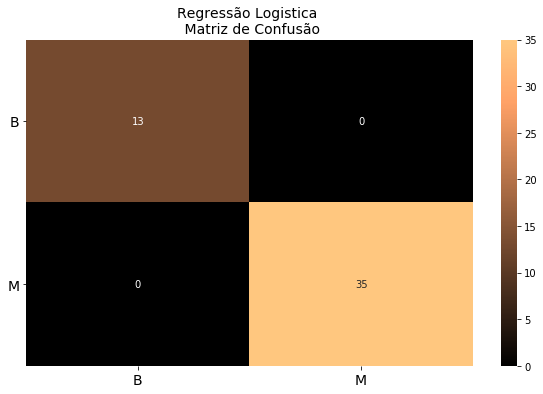

In [40]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(cm_logreg, ax=ax, annot=True, cmap=plt.cm.copper)
ax.set_title("Regressão Logistica \n Matriz de Confusão", fontsize=14)
ax.set_xticklabels(['B', 'M'], fontsize=14, rotation=0)
ax.set_yticklabels(['B', 'M'], fontsize=14, rotation=360)

In [41]:
print("KNN")
knears_params = {"n_neighbors": list(range(5,30,1)),'leaf_size' : list(range(3,11,1)), 'weights': ['uniform', 'distance']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params,n_jobs=8,cv=10,scoring='roc_auc_ovo')
grid_knears.fit(X_train, y_train)
knn = grid_knears.best_estimator_
knears_score = cross_val_score(knn, X_train, y_train, cv=10,scoring='roc_auc_ovo')
knears_score_teste = cross_val_score(knn, X_test, y_test, cv=10,scoring='roc_auc_ovo')
print("Best Estimator")
print(knn)
print('Score KNN Treino: ', round(knears_score.mean() * 100, 2).astype(str) + '%')
print('Score KNN Teste: ', round(knears_score_teste.mean() * 100, 2).astype(str) + '%')

KNN
Best Estimator
KNeighborsClassifier(algorithm='auto', leaf_size=3, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='distance')
Score KNN Treino:  100.0%
Score KNN Teste:  100.0%


In [42]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=3, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='distance')

In [43]:
Y_pred_knn = knn.predict(X_test)

In [44]:
cm_knn = confusion_matrix(y_test,Y_pred_knn)

In [45]:
acc_score_knn = accuracy_score(y_test,Y_pred_knn)
f1_score_knn = f1_score(y_test,Y_pred_knn)
precisao_knn = average_precision_score(y_test,Y_pred_knn)
recall_knn = recall_score(y_test,Y_pred_knn)
roc_knn = roc_auc_score(y_test,Y_pred_knn,multi_class='ovo')
print('Acuracia KNN ',round(acc_score_knn*100,2).astype(str)+'%')
print('Precião média KNN ',round(precisao_knn*100,2).astype(str)+'%')
print('F1 KNN ',round(f1_score_knn*100,2).astype(str)+'%')
print('Recall KNN ',round(recall_knn*100,2).astype(str)+'%')
print('ROC KNN ',round(roc_knn*100,2).astype(str)+'%')

Acuracia KNN  100.0%
Precião média KNN  100.0%
F1 KNN  100.0%
Recall KNN  100.0%
ROC KNN  100.0%


In [46]:
accuracy.append(acc_score_knn)
precision.append(precisao_knn)
recall.append(recall_knn)
f1.append(f1_score_knn)
roc.append(roc_knn)

[Text(0, 0.5, 'B'), Text(0, 1.5, 'M')]

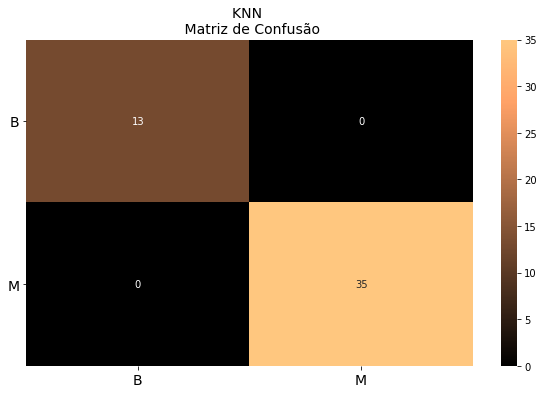

In [47]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(cm_knn, ax=ax, annot=True, cmap=plt.cm.copper)
ax.set_title("KNN \n Matriz de Confusão", fontsize=14)
ax.set_xticklabels(['B', 'M'], fontsize=14, rotation=0)
ax.set_yticklabels(['B', 'M'], fontsize=14, rotation=360)

In [48]:
print("Ada Boost Classifier")
ada_params = {'n_estimators' : list(range(10,200))}
grid_ada = GridSearchCV(AdaBoostClassifier(), ada_params,n_jobs=8,cv=10,scoring='roc_auc_ovo')
grid_ada.fit(X_train, y_train)
ada = grid_ada.best_estimator_
print("Best Estimator")
print(ada)
ada_score = cross_val_score(ada, X_train, y_train, cv=10,scoring='roc_auc_ovo')
ada_score_teste = cross_val_score(ada, X_test, y_test, cv=10,scoring='roc_auc_ovo')
print('Score AdaBoost Treino: ', round(ada_score.mean() * 100, 2).astype(str) + '%')
print('Score AdaBoost Teste: ', round(ada_score_teste.mean() * 100, 2).astype(str) + '%')

Ada Boost Classifier
Best Estimator
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=10, random_state=None)
Score AdaBoost Treino:  100.0%
Score AdaBoost Teste:  95.0%


In [49]:
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=10, random_state=None)

In [50]:
Y_pred_ada = ada.predict(X_test)

In [51]:
cm_ada = confusion_matrix(y_test,Y_pred_ada)

In [52]:
acc_score_ada = accuracy_score(y_test,Y_pred_ada)
f1_score_ada = f1_score(y_test,Y_pred_ada)
precisao_ada = average_precision_score(y_test,Y_pred_ada)
recall_ada = recall_score(y_test,Y_pred_ada)
roc_ada = roc_auc_score(y_test,Y_pred_ada,multi_class='ovo')
print('Acuracia ADA Boost ',round(acc_score_ada*100,2).astype(str)+'%')
print('Precião média Ada Boost ',round(precisao_ada*100,2).astype(str)+'%')
print('F1 Ada Boost ',round(f1_score_ada*100,2).astype(str)+'%')
print('Recall Ada Boost ',round(recall_ada*100,2).astype(str)+'%')
print('ROC Ada Boost ',round(roc_ada*100,2).astype(str)+'%')

Acuracia ADA Boost  100.0%
Precião média Ada Boost  100.0%
F1 Ada Boost  100.0%
Recall Ada Boost  100.0%
ROC Ada Boost  100.0%


In [53]:
accuracy.append(acc_score_ada)
precision.append(precisao_ada)
recall.append(recall_ada)
f1.append(f1_score_ada)
roc.append(roc_ada)

[Text(0, 0.5, 'B'), Text(0, 1.5, 'M')]

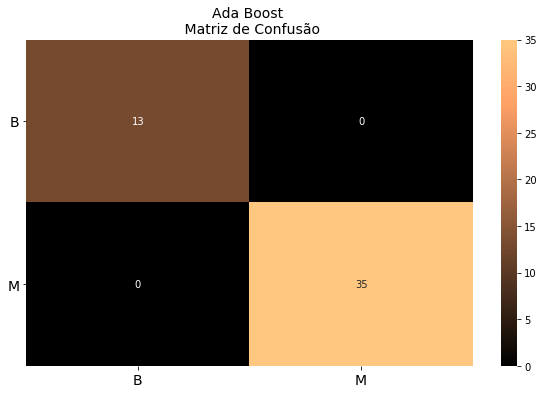

In [54]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(cm_ada, ax=ax, annot=True, cmap=plt.cm.copper)
ax.set_title("Ada Boost \n Matriz de Confusão", fontsize=14)
ax.set_xticklabels(['B', 'M'], fontsize=14, rotation=0)
ax.set_yticklabels(['B', 'M'], fontsize=14, rotation=360)

In [55]:
print("Random Forest Classifier")
forest_params = {"max_depth": list(range(5,10,1)),"n_estimators" : list(range(5,10,1))}
forest = GridSearchCV(RandomForestClassifier(), forest_params,n_jobs=8,cv=10,scoring='roc_auc_ovo')
forest.fit(X_train, y_train)
random_forest = forest.best_estimator_
print("Best Estimator")
print(random_forest)
forest_score = cross_val_score(random_forest, X_train, y_train, cv=10,scoring='roc_auc_ovo')
forest_score_teste = cross_val_score(random_forest, X_test, y_test, cv=10,scoring='roc_auc_ovo')
print('Score RFC Treino: ', round(forest_score.mean() * 100, 2).astype(str) + '%')
print('Score RFC Teste: ', round(forest_score_teste.mean() * 100, 2).astype(str) + '%')

Random Forest Classifier
Best Estimator
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Score RFC Treino:  100.0%
Score RFC Teste:  100.0%


In [56]:
random_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
Y_pred_rf = random_forest.predict(X_test)

In [58]:
cm_rf = confusion_matrix(y_test,Y_pred_rf)

In [59]:
acc_score_rf = accuracy_score(y_test,Y_pred_rf)
f1_score_rf = f1_score(y_test,Y_pred_rf)
precisao_rf = average_precision_score(y_test,Y_pred_rf)
recall_rf = recall_score(y_test,Y_pred_rf)
roc_rf = roc_auc_score(y_test,Y_pred_rf,multi_class='ovo')
print('Acuracia Random Forest ',round(acc_score_rf*100,2).astype(str)+'%')
print('Precião média Random Forest ',round(precisao_rf*100,2).astype(str)+'%')
print('F1 Random Forest ',round(f1_score_rf*100,2).astype(str)+'%')
print('Recall Random Forest ',round(recall_rf*100,2).astype(str)+'%')
print('ROC Random Forest ',round(roc_rf*100,2).astype(str)+'%')

Acuracia Random Forest  97.92%
Precião média Random Forest  97.22%
F1 Random Forest  98.59%
Recall Random Forest  100.0%
ROC Random Forest  96.15%


In [60]:
accuracy.append(acc_score_rf)
precision.append(precisao_rf)
recall.append(recall_rf)
f1.append(f1_score_rf)
roc.append(roc_rf)

[Text(0, 0.5, 'B'), Text(0, 1.5, 'M')]

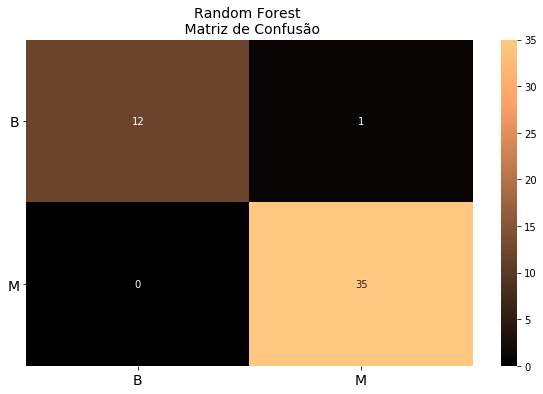

In [61]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(cm_rf, ax=ax, annot=True, cmap=plt.cm.copper)
ax.set_title("Random Forest \n Matriz de Confusão", fontsize=14)
ax.set_xticklabels(['B', 'M'], fontsize=14, rotation=0)
ax.set_yticklabels(['B', 'M'], fontsize=14, rotation=360)

In [62]:
print("Gradient Boost Classifier")
grad_params = {'n_estimators' : list(range(5,10,1)),'max_depth' : list(range(5,11,1))}
grad = GridSearchCV(GradientBoostingClassifier(), grad_params,n_jobs=8,cv=10,scoring='roc_auc_ovo')
grad.fit(X_train, y_train)
grad_boost = grad.best_estimator_
print("Best Estimator")
print(grad_boost)
grad_score = cross_val_score(grad_boost, X_train, y_train, cv=10,scoring='roc_auc_ovo')
grad_score_teste = cross_val_score(grad_boost, X_test, y_test, cv=10,scoring='roc_auc_ovo')
print('Score GradBoost Treino: ', round(grad_score.mean() * 100, 2).astype(str) + '%')
print('Score GradBoost Teste: ', round(grad_score_teste.mean() * 100, 2).astype(str) + '%')

Gradient Boost Classifier
Best Estimator
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=5,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Score GradBoost Treino:  100.0%
Score GradBoost Teste:  100.0%


In [63]:
grad_boost.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=5,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [64]:
Y_pred_gb = grad_boost.predict(X_test)

In [65]:
cm_gb = confusion_matrix(y_test,Y_pred_gb)

In [66]:
acc_score_gb = accuracy_score(y_test,Y_pred_gb)
f1_score_gb = f1_score(y_test,Y_pred_gb)
precisao_gb = average_precision_score(y_test,Y_pred_gb)
recall_gb = recall_score(y_test,Y_pred_gb)
roc_gb = roc_auc_score(y_test,Y_pred_gb,multi_class='ovo')
print('Acuracia Gradient Boosting ',round(acc_score_gb*100,2).astype(str)+'%')
print('Precião média Gradient Boosting  ',round(precisao_gb*100,2).astype(str)+'%')
print('F1 Gradient Boosting  ',round(f1_score_gb*100,2).astype(str)+'%')
print('Recall Gradient Boosting  ',round(recall_gb*100,2).astype(str)+'%')
print('ROC Gradient Boosting ',round(roc_gb*100,2).astype(str)+'%')

Acuracia Gradient Boosting  97.92%
Precião média Gradient Boosting   97.22%
F1 Gradient Boosting   98.59%
Recall Gradient Boosting   100.0%
ROC Gradient Boosting  96.15%


In [67]:
accuracy.append(acc_score_gb)
precision.append(precisao_gb)
recall.append(recall_gb)
f1.append(f1_score_gb)
roc.append(roc_gb)

[Text(0, 0.5, 'B'), Text(0, 1.5, 'M')]

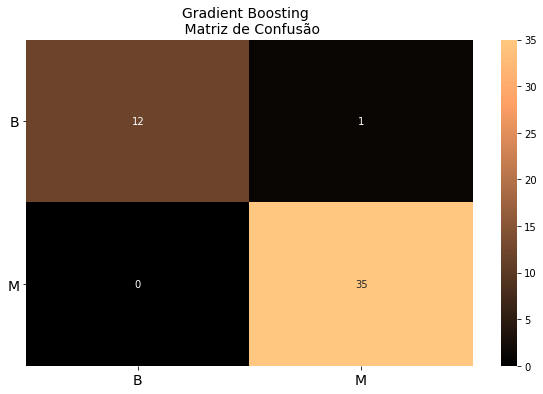

In [68]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(cm_gb, ax=ax, annot=True, cmap=plt.cm.copper)
ax.set_title("Gradient Boosting  \n Matriz de Confusão", fontsize=14)
ax.set_xticklabels(['B', 'M'], fontsize=14, rotation=0)
ax.set_yticklabels(['B', 'M'], fontsize=14, rotation=360)

In [69]:
resultados = [log_reg_score,knears_score,ada_score,forest_score,grad_score]
resultados_teste = [log_reg_score_teste,knears_score_teste,ada_score_teste,forest_score_teste,grad_score_teste]
nome_modelo = ["Logistic Regression","KNN","AdaBoost","RFC","GradBoost"]

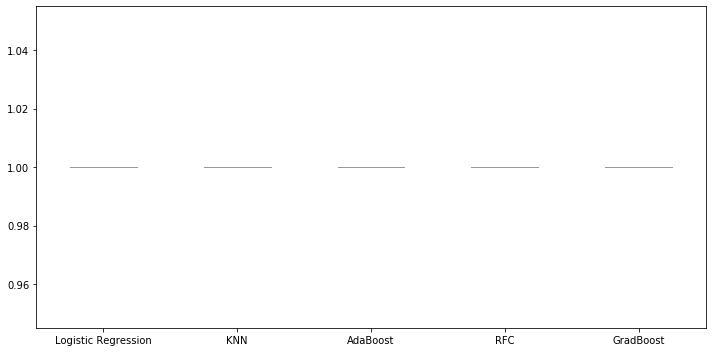

In [70]:
fig,ax=plt.subplots(figsize=(10,5))
ax.boxplot(resultados)
ax.set_xticklabels(nome_modelo)
plt.tight_layout()

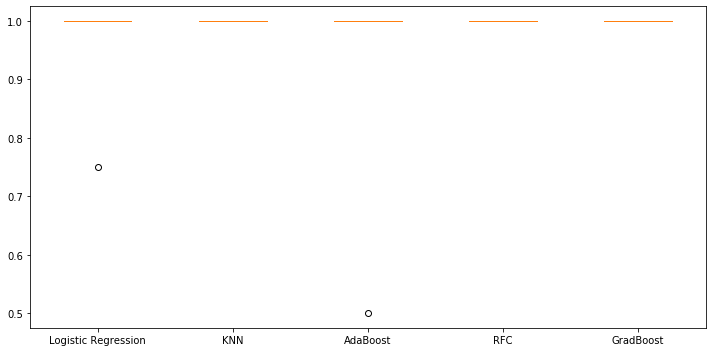

In [71]:
fig,ax=plt.subplots(figsize=(10,5))
ax.boxplot(resultados_teste)
ax.set_xticklabels(nome_modelo)
plt.tight_layout()

In [72]:
n_inputs = X_train.shape[1]

In [74]:
from keras.models import Sequential
from keras.layers import Activation,BatchNormalization
from keras.layers.core import Dense,Dropout
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.callbacks import ReduceLROnPlateau,EarlyStopping

Using TensorFlow backend.


In [84]:
modelo = Sequential()
modelo.add(Dense(128, input_shape=(n_inputs, ), activation='relu', kernel_initializer='glorot_uniform',bias_initializer='zeros'))
modelo.add(BatchNormalization())
modelo.add(Dense(256, activation='relu', kernel_initializer='glorot_uniform',bias_initializer='zeros'))
modelo.add(BatchNormalization())
modelo.add(Dropout(0.5))
modelo.add(Dense(512, activation='relu', kernel_initializer='glorot_uniform',bias_initializer='zeros'))
modelo.add(BatchNormalization())
modelo.add(Dense(512, activation='relu', kernel_initializer='glorot_uniform',bias_initializer='zeros'))
modelo.add(BatchNormalization())
modelo.add(Dropout(0.5))
modelo.add(Dense(256, activation='relu', kernel_initializer='glorot_uniform',bias_initializer='zeros'))
modelo.add(BatchNormalization())
modelo.add(Dense(128, activation='relu', kernel_initializer='glorot_uniform',bias_initializer='zeros'))
modelo.add(BatchNormalization())
modelo.add(Dropout(0.5))
modelo.add(Dense(2, activation='softmax', kernel_initializer='glorot_uniform',bias_initializer='zeros'))

In [85]:
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, mode='auto', min_delta=0.0001)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
callbacks_list = [reduce_lr,es]
bsize = 50

In [86]:
modelo.compile(Adam(lr=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modelo.fit(X_train, y_train, batch_size=bsize, epochs=200, verbose=2, validation_data=(X_test,y_test),callbacks=callbacks_list)

Train on 110 samples, validate on 48 samples
Epoch 1/200
 - 2s - loss: 0.6079 - accuracy: 0.7636 - val_loss: 225.1300 - val_accuracy: 0.2708
Epoch 2/200
 - 0s - loss: 0.4139 - accuracy: 0.8727 - val_loss: 374.3413 - val_accuracy: 0.2708
Epoch 3/200
 - 0s - loss: 0.4302 - accuracy: 0.8818 - val_loss: 592.1914 - val_accuracy: 0.2708
Epoch 4/200
 - 0s - loss: 0.1459 - accuracy: 0.9545 - val_loss: 769.6418 - val_accuracy: 0.2708

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
Epoch 5/200
 - 0s - loss: 0.1965 - accuracy: 0.9273 - val_loss: 677.3504 - val_accuracy: 0.2708
Epoch 6/200
 - 0s - loss: 0.1505 - accuracy: 0.9455 - val_loss: 653.7763 - val_accuracy: 0.2708
Epoch 7/200
 - 0s - loss: 0.1953 - accuracy: 0.9455 - val_loss: 547.4396 - val_accuracy: 0.2708

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0024999999441206455.
Epoch 8/200
 - 0s - loss: 0.1539 - accuracy: 0.9545 - val_loss: 412.0943 - val_accuracy: 0.2708
Epoch 9/200
 - 0s - loss: 

Epoch 75/200
 - 0s - loss: 0.1452 - accuracy: 0.9364 - val_loss: 0.0461 - val_accuracy: 0.9792

Epoch 00075: ReduceLROnPlateau reducing learning rate to 3.0517577442878974e-07.
Epoch 76/200
 - 0s - loss: 0.0721 - accuracy: 0.9727 - val_loss: 0.0459 - val_accuracy: 0.9792
Epoch 77/200
 - 0s - loss: 0.4397 - accuracy: 0.9364 - val_loss: 0.0449 - val_accuracy: 0.9792
Epoch 78/200
 - 0s - loss: 0.3480 - accuracy: 0.9545 - val_loss: 0.0437 - val_accuracy: 0.9792

Epoch 00078: ReduceLROnPlateau reducing learning rate to 1.5258788721439487e-07.
Epoch 79/200
 - 0s - loss: 0.1607 - accuracy: 0.9455 - val_loss: 0.0446 - val_accuracy: 0.9792
Epoch 80/200
 - 0s - loss: 0.0986 - accuracy: 0.9364 - val_loss: 0.0446 - val_accuracy: 0.9792
Epoch 81/200
 - 0s - loss: 0.0901 - accuracy: 0.9545 - val_loss: 0.0443 - val_accuracy: 0.9792

Epoch 00081: ReduceLROnPlateau reducing learning rate to 7.629394360719743e-08.
Epoch 82/200
 - 0s - loss: 0.0914 - accuracy: 0.9636 - val_loss: 0.0434 - val_accuracy: 0.

 - 0s - loss: 0.0887 - accuracy: 0.9455 - val_loss: 0.0437 - val_accuracy: 0.9792
Epoch 143/200
 - 0s - loss: 0.0548 - accuracy: 0.9727 - val_loss: 0.0437 - val_accuracy: 0.9792
Epoch 144/200
 - 0s - loss: 0.1262 - accuracy: 0.9545 - val_loss: 0.0436 - val_accuracy: 0.9792

Epoch 00144: ReduceLROnPlateau reducing learning rate to 3.63797872577655e-14.
Epoch 145/200
 - 0s - loss: 0.1424 - accuracy: 0.9545 - val_loss: 0.0436 - val_accuracy: 0.9792
Epoch 146/200
 - 0s - loss: 0.0724 - accuracy: 0.9727 - val_loss: 0.0436 - val_accuracy: 0.9792
Epoch 147/200
 - 0s - loss: 0.0789 - accuracy: 0.9545 - val_loss: 0.0437 - val_accuracy: 0.9792

Epoch 00147: ReduceLROnPlateau reducing learning rate to 1.818989362888275e-14.
Epoch 148/200
 - 0s - loss: 0.0625 - accuracy: 0.9818 - val_loss: 0.0440 - val_accuracy: 0.9792
Epoch 149/200
 - 0s - loss: 0.1845 - accuracy: 0.9182 - val_loss: 0.0440 - val_accuracy: 0.9792
Epoch 150/200
 - 0s - loss: 0.0997 - accuracy: 0.9545 - val_loss: 0.0442 - val_accura

In [87]:
Y_pred_keras = modelo.predict_classes(X_test, batch_size=bsize, verbose=0)

In [88]:
cm_keras = confusion_matrix(y_test,Y_pred_keras)
acc_score_keras = accuracy_score(y_test,Y_pred_keras)
f1_score_keras = f1_score(y_test,Y_pred_keras)
precisao_keras = average_precision_score(y_test,Y_pred_keras)
recall_keras = recall_score(y_test,Y_pred_keras)
roc_keras = roc_auc_score(y_test,Y_pred_keras,multi_class='ovo')
print('Acuracia Keras ',round(acc_score_keras*100,2).astype(str)+'%')
print('Precião média Keras  ',round(precisao_keras*100,2).astype(str)+'%')
print('F1 Keras  ',round(f1_score_keras*100,2).astype(str)+'%')
print('Recall Keras  ',round(recall_keras*100,2).astype(str)+'%')
print('ROC Keras ',round(roc_keras*100,2).astype(str)+'%')

Acuracia Keras  97.92%
Precião média Keras   97.22%
F1 Keras   98.59%
Recall Keras   100.0%
ROC Keras  96.15%


In [89]:
accuracy.append(acc_score_keras)
precision.append(precisao_keras)
recall.append(recall_keras)
f1.append(f1_score_keras)
roc.append(roc_keras)

[Text(0, 0.5, 'B'), Text(0, 1.5, 'M')]

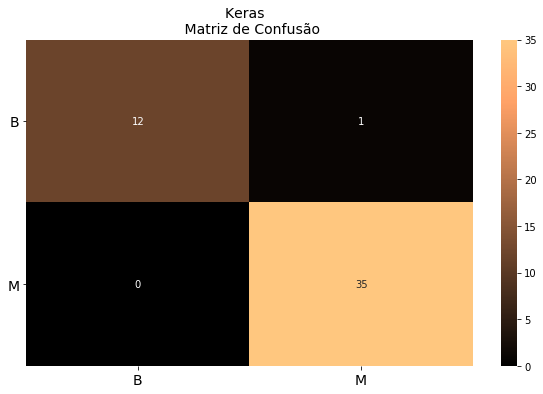

In [90]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(cm_keras, ax=ax, annot=True, cmap=plt.cm.copper)
ax.set_title("Keras  \n Matriz de Confusão", fontsize=14)
ax.set_xticklabels(['B', 'M'], fontsize=14, rotation=0)
ax.set_yticklabels(['B', 'M'], fontsize=14, rotation=360)

In [91]:
nome_modelo = ["Logistic Regression","KNN","AdaBoost","RFC","GradBoost","Keras"]
dic_metrics = {'Model' : nome_modelo, 'Accuracy' : accuracy, 'Precision' : precision, 'Recall' : recall, 'F1' : f1, 'ROC' : roc}
dataframe = pd.DataFrame(dic_metrics)

In [92]:
dataframe_sorted =  dataframe.sort_values(by=['ROC','Accuracy','Recall','F1','Precision'],ascending=False).reset_index().drop('index',axis=1)

In [93]:
dataframe_sorted

,Model,Accuracy,Precision,Recall,F1,ROC
0,Logistic Regression,1.000000,1.000000,1.0,1.000000,1.000000
1,KNN,1.000000,1.000000,1.0,1.000000,1.000000
2,AdaBoost,1.000000,1.000000,1.0,1.000000,1.000000
3,RFC,0.979167,0.972222,1.0,0.985915,0.961538
4,GradBoost,0.979167,0.972222,1.0,0.985915,0.961538
5,Keras,0.979167,0.972222,1.0,0.985915,0.961538
